# MINI PROJECT - STOCK PRICE PREDICTION USING MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf

In [2]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]['Symbol']

print(tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


# Data Frame

In [3]:
for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    display(history)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-11,79.629997,81.059998,76.970001,77.580002,50.507481,8414500
2008-01-14,78.129997,78.639999,77.500000,78.500000,51.106434,2927600
2008-01-15,78.000000,78.699997,77.029999,77.180000,50.247047,4206500
2008-01-16,76.830002,78.580002,76.830002,77.300003,50.325184,4467500
2008-01-17,77.379997,77.690002,74.470001,74.959999,48.801750,7093000
...,...,...,...,...,...,...
2022-12-30,119.650002,120.029999,118.510002,119.919998,119.919998,2094900
2023-01-03,121.519997,122.639999,120.370003,122.470001,122.470001,2612800
2023-01-04,123.349998,125.290001,122.709999,125.150002,125.150002,2769700


# Reduced Data Frame

In [11]:
for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    display(history)

[*********************100%***********************]  1 of 1 completed


,Open,Close,Volume
Date,,,
2008-01-11,79.629997,77.580002,8414500
2008-01-14,78.129997,78.500000,2927600
2008-01-15,78.000000,77.180000,4206500
2008-01-16,76.830002,77.300003,4467500
2008-01-17,77.379997,74.959999,7093000
...,...,...,...
2022-12-30,119.650002,119.919998,2094900
2023-01-03,121.519997,122.470001,2612800
2023-01-04,123.349998,125.150002,2769700


# Modified Data Frame

In [4]:
for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes = history.index.values
    weekdays = []
    
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
        
    history['weekday'] = weekdays
    display(history)

[*********************100%***********************]  1 of 1 completed


,Open,Close,Volume,Prev_Close,Prev_Volume,weekday
Date,,,,,,
2008-01-11,79.629997,77.580002,8414500,NaN,NaN,4
2008-01-14,78.129997,78.500000,2927600,77.580002,8414500.0,0
2008-01-15,78.000000,77.180000,4206500,78.500000,2927600.0,1
2008-01-16,76.830002,77.300003,4467500,77.180000,4206500.0,2
2008-01-17,77.379997,74.959999,7093000,77.300003,4467500.0,3
...,...,...,...,...,...,...
2022-12-30,119.650002,119.919998,2094900,120.570000,2060800.0,4
2023-01-03,121.519997,122.470001,2612800,119.919998,2094900.0,1
2023-01-04,123.349998,125.150002,2769700,122.470001,2612800.0,2


# Simple Moving Averaging

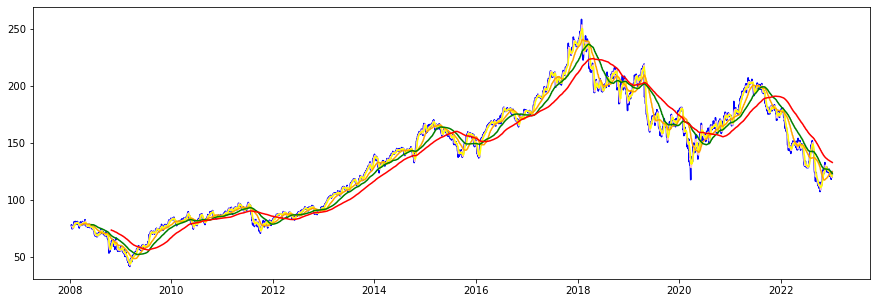

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

In [5]:

history['5SMA'] = history['Prev_Close'].rolling(5).mean()
history['10SMA'] = history['Prev_Close'].rolling(10).mean()
history['50SMA'] = history['Prev_Close'].rolling(50).mean()
history['100SMA'] = history['Prev_Close'].rolling(100).mean()
history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
x = history.index.values


plt.figure(figsize = (15,5))
plt.plot(x, history['Prev_Close'], color = 'blue')
plt.plot(x,history['5SMA'], color = 'Pink')
plt.plot(x,history['10SMA'], color = 'yellow')
plt.plot(x,history['50SMA'], color = 'orange')
plt.plot(x,history['100SMA'], color = 'green')
plt.plot(x, history['200SMA'], color = 'red')
plt.show()
    
plt.figure(figsize = (15, 3))
# display(history)

# Linear Regression


MMM


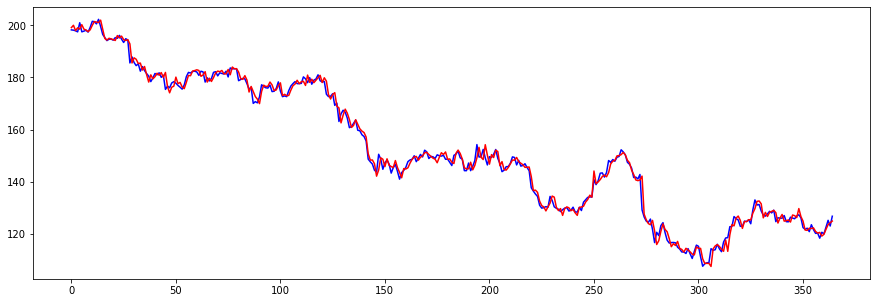

In [7]:
#Importing Linear Regression model
from sklearn.linear_model import LinearRegression


y = history['Close']
X = history.drop(['Close', 'Volume'], axis = 1).values

#Splitting into training and testing
num_test = 365
X_train = X[:-1 * num_test]
y_train = y[:-1 * num_test]
X_test = X[-1 * num_test:]
y_test = y[-1 * num_test:]

model = LinearRegression()
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

print(ticker)
plt.figure(figsize=(15, 5))
plt.plot(range(len(y_test)), y_test, 'blue')
plt.plot(range(len(preds)), preds, 'red')
plt.show()

# Stock Price Prediction for 10 Companies using Linear Regression

[*********************100%***********************]  1 of 1 completed
ZTS


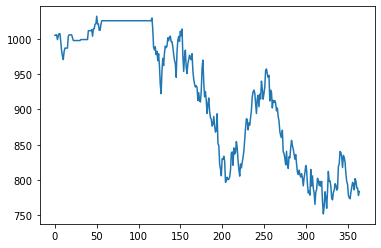

Investing_Total: 729.8433154862797 -27.0%
Algo-Trading Total: 783.7865056746563 -21.6%


In [11]:
from sklearn.linear_model import LinearRegression

#Calculating the price of the stock
def test_it(opens, Closes, preds, start_account = 1000, thresh = 0):
    account = start_account
    changes = []
    
    for i in range(len(preds)):
        if(preds[i] - opens[i]) / opens[i] >= thresh:
            account += account * (Closes[i] - opens[i]) / opens[i]
        changes.append(account)
    changes = np.array(changes)
    
    plt.plot(range(len(changes)), changes)
    plt.show()
    
    invest_total = start_account + start_account * (Closes[-1] - opens[0]) / opens[0]
    print('Investing_Total:', invest_total, str(round((invest_total - start_account) / start_account * 100,1))+'%')
    print('Algo-Trading Total:', account, str(round((account - start_account) / start_account * 100,1))+'%')



def calc_macd(date, len1, len2, len3):
    shortEMA = date.ewm(span = len1, adjust = False).mean()
    longEMA = date.ewm(span = len2, adjust = False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span = len3, adjust = False).mean()
    return MACD, signal

for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days = 15 * 365)
    
    history = yf.download(ticker, start = start_date, end = end_date, interval = '1d', prepost = False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes = history.index.values
    weekdays = []
    
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
        
    history['weekday'] = weekdays
#     display(history)
    #Mean values of Simple moving average 
    history['5SMA'] = history['Prev_Close'].rolling(5).mean()
    history['10SMA'] = history['Prev_Close'].rolling(10).mean()
    history['20SMA'] = history['Prev_Close'].rolling(20).mean()
    history['50SMA'] = history['Prev_Close'].rolling(50).mean()
    history['100SMA'] = history['Prev_Close'].rolling(100).mean()
    history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
    
    MACD, signal = calc_macd(history['Prev_Close'], 12, 26, 9)
    history['MACD'] = MACD
    history['MACD_signal'] = signal
    history = history.replace(np.inf, np.nan).dropna()
    X = history.drop(['Close', 'Volume'], axis = 1).values
    y = history['Close']

    #Splitting model into training and testing 
    num_test = 365
    X_train = X[:-1 * num_test]
    y_train = y[:-1 * num_test]
    X_test = X[-1 * num_test:]
    y_test = y[-1 * num_test:]

    model = LinearRegression()
    model = model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(ticker)
    test_it(X_test.T[0], y_test, preds, 1000, 0) 